# MP1 Quantum Circuits

## Problem #4

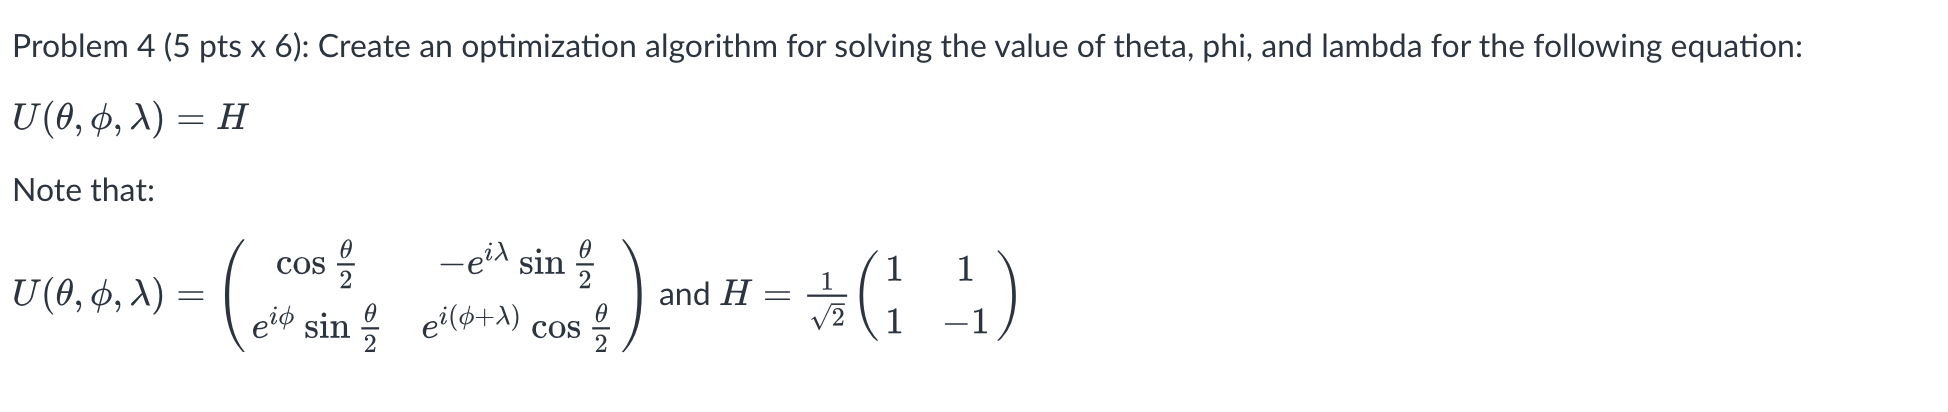

The optimization of the parameters Θ, ϕ, and λ for the unitary U( Θ, ϕ, and λ) can be formulated as a quantum operator-matching problem that can be approahed with the Altnerating Direction Method of Multipliers (ADMM). According to Man & Wang, ADMM can be used to optimize quantum state transformation such that a unitary matrix X can be brought closer to a unitary constraint Y [1]. This is done by minimizing an objective function with respect to the matrix and constant which by looking at the Frobenius norm. The Frobenium norm is a component of the objective function that penalizes the difference between the matrix and unitary constraint.  

[1] Lai, Kin Man, and Xin Wang. “Group Sparse Matrix Optimization for Efficient Quantum State Transformation.” Physical Review A, vol. 110, no. 2, 29 Aug. 2024, https://doi.org/10.1103/physreva.110.022445. Accessed 17 Nov. 2025.

In [25]:
import numpy as np
from scipy.optimize import minimize

# Define data structure for unitary matrix X
def U(theta, phi, lam):
    return np.array([
        [np.cos(theta/2),               -np.exp(1j*lam)*np.sin(theta/2)],
        [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*(phi+lam))*np.cos(theta/2)]
    ])

# Define target unitary constraint - Hadamard Gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]])

#Cost function to minimize
def cost(params):
    theta, phi, lam = params
    X = U(theta, phi, lam)

    # Frobenius norm squared of the difference between U and H
    diff = X - H
    return np.linalg.norm(diff)**2

# Initial guess for (θ, φ, λ)
x0 = np.array([1.0, 0.5, 2.0])

# Bounds for parameters (0 to 2π)
bounds = [(0, 2*np.pi), (0, 2*np.pi), (0, 2*np.pi)]

result = minimize(cost, x0, bounds=bounds)

print("Optimization success:", result.success)
print("Final cost:", result.fun)
theta_opt, phi_opt, lam_opt = result.x
print("theta ≈", theta_opt)
print("phi   ≈", phi_opt)
print("lambda≈", lam_opt)

# Compare matrices
U_opt = U(theta_opt, phi_opt, lam_opt)
print("\nU(θ,φ,λ) found by optimization:")
print(U_opt)
print("\nHadamard H:")
print(H)
print("\nAre they (numerically) equal? ->", np.allclose(U_opt, H))


Optimization success: True
Final cost: 2.6322379275711153e-13
theta ≈ 1.570796342373269
phi   ≈ 0.0
lambda≈ 3.141592140654661

U(θ,φ,λ) found by optimization:
[[ 0.70710678+0.00000000e+00j  0.70710679-3.62699913e-07j]
 [ 0.70710679+0.00000000e+00j -0.70710678+3.62699908e-07j]]

Hadamard H:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Are they (numerically) equal? -> True
